In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from matplotlib          import rcParams, rc
# Change the matplotlib default parameters
# rcParams.update({'font.size':   12})
rcParams.update({'figure.dpi': 200})
# rc('font', family='serif')
# rc('text', usetex=True)

from astropy import units as units

from src.odes           import ODE
from src.rates          import initialise_abs, calculate_rates
from src.input          import setinput, getcst

from scipy.integrate    import solve_ivp
from astropy            import constants

CO = 71

In [2]:
## constants
kB, mH, rGr, nGr, stckH, AUV_AV = getcst()

## input values physics
ρ, T, δ, Av, chemtype = setinput()

## input chemistry
chemtype = 'C'

## calculate H accretion on dust
Haccr = stckH *np.pi*(rGr**2.0)*ρ*nGr*(8.0*kB*T/(np.pi*mH))**0.5

yr_to_sec = units.year.to('s')         ## year in seconds

Input:
------
ρ  = 1.13E+05
T  = 2500.0
δ  = 1.0
Av = 1.0

Chem type = O


In [3]:
print(yr_to_sec)

31557600.0


In [4]:
n, nconsv, specs = initialise_abs(chemtype)     # n_consv = TOTAL in fortran code
timesteps = 1

ndot        = np.zeros(len(n))
nconsvdot   = np.zeros(len(nconsv))
t           = np.zeros(timesteps)

k = calculate_rates(T, δ, Av)

In [5]:
t=0.0
# ODE(t, n, n_consv, ndot, X, k, ρ, Haccr)

In [56]:
Δt = 1.0e+2*yr_to_sec  ## in sec

Δt = 1.e+2

solution = solve_ivp(
    fun          = ODE,
    t_span       = [0.0, Δt],
    y0           = n,
    method       = 'BDF',   ## zoals DVODE
    args         = (ndot, nconsvdot, nconsv,k, ρ, Haccr),
    dense_output = False    ## if True: returns interpolation function
)

assert solution['status'] == 0

ys = solution['y']
ts = solution['t']

print(solution['message'])

The solver successfully reached the end of the integration interval.


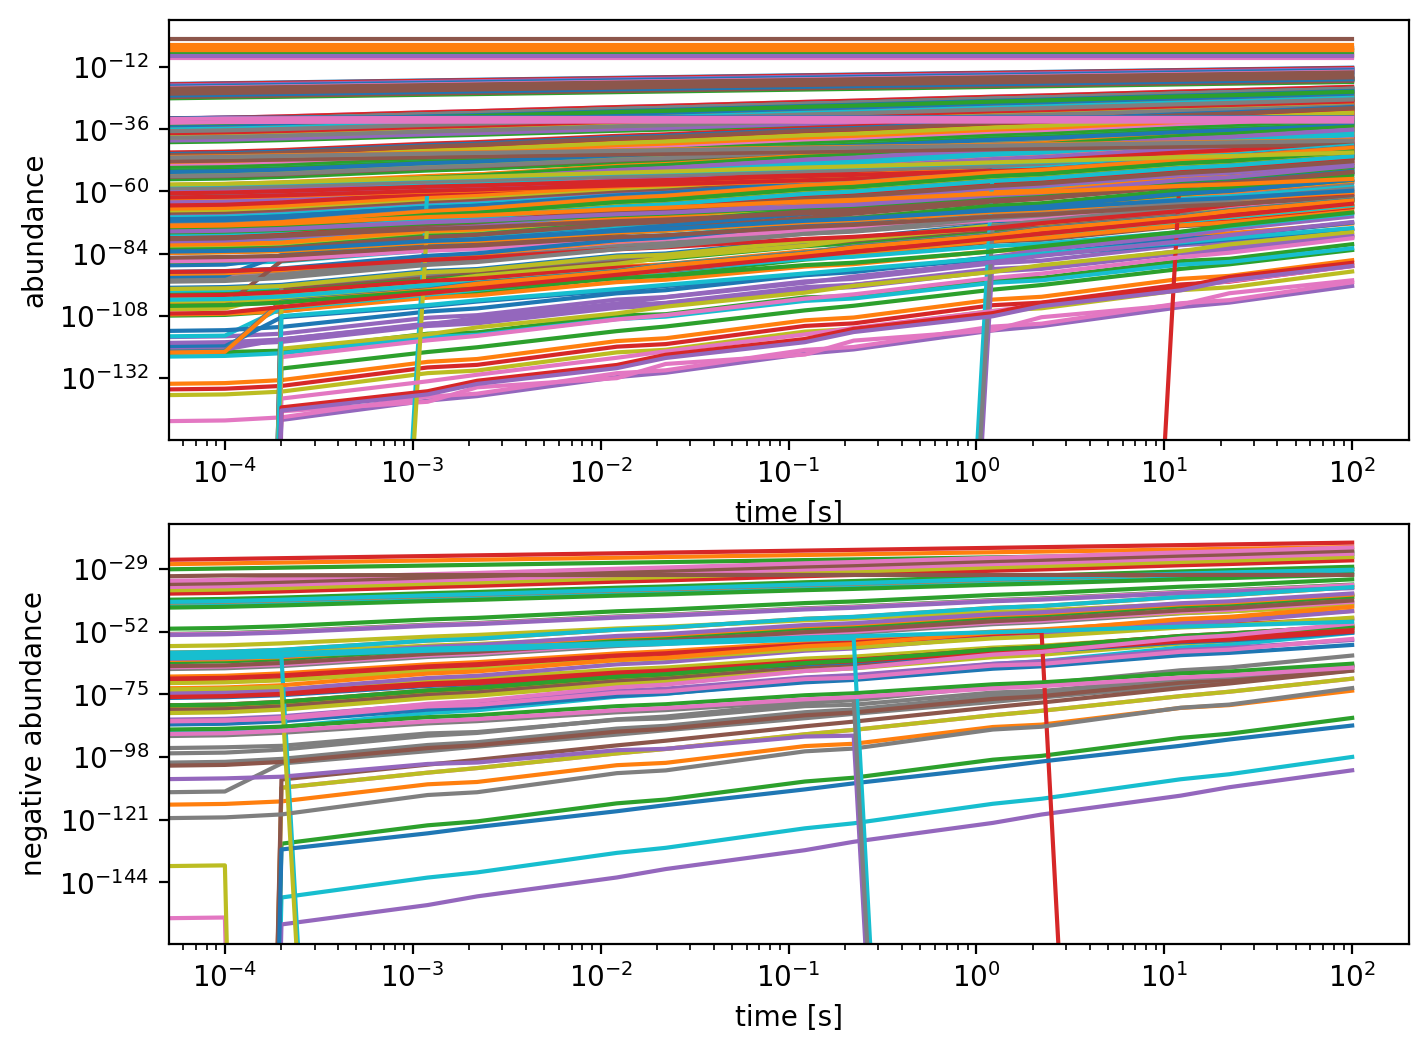

In [57]:
fig = plt.figure(figsize=(8,6))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
axs = [ax1,ax2]

for i in range(ys.shape[0]):
    ax1.plot(ts, ys[i])
    ax2.plot(ts, -ys[i])

for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')

    # ax.set_ylim((1.0e-40, 1.0e+0))

    ax.set_xlabel('time [s]')
ax1.set_ylabel('abundance')
ax2.set_ylabel('negative abundance')

plt.show()

### Search for negatives

In [58]:
def search_negs(ys, elwise = False, el = None):
    idx_neg = list()

    if elwise == False:
        for i in range(ys.shape[0]):
            if np.any(ys[i] < 0):
                idx_neg.append(i)

    if elwise == True:
        for i in range(ys.shape[0]):
            if np.any(ys[i][el] < 0):
                idx_neg.append(i)


    specs_neg = list()

    for idx in idx_neg:
        specs_neg.append(specs[idx])

    return idx_neg, specs_neg

In [59]:
idx_neg, specs_neg = search_negs(ys)
print(len(idx_neg))
print(idx_neg)
print(specs_neg)

79
[1, 2, 3, 7, 11, 29, 42, 51, 57, 82, 83, 85, 91, 92, 98, 101, 109, 113, 117, 118, 122, 128, 136, 161, 165, 178, 182, 186, 188, 189, 192, 194, 196, 202, 208, 211, 212, 215, 216, 217, 227, 234, 235, 248, 255, 260, 263, 282, 287, 294, 296, 320, 323, 329, 353, 354, 356, 365, 367, 368, 373, 379, 391, 392, 394, 396, 397, 399, 400, 409, 416, 418, 424, 427, 428, 439, 452, 456, 465]
['H+', 'H-', 'H2+', 'HeH+', 'CH-', 'OH-', 'HF+', 'C2H-', 'CN-', 'HOC+', 'N2H+', 'SiH2', 'CH3CH3', 'SiH2+', 'SiH3+', 'C2H7+', 'SiH4+', 'PH+', 'O2H', 'PH2+', 'O2H+', 'H3S+', 'H2Cl+', 'HCSi+', 'C3H6+', 'CP+', 'HONC', 'C3H7+', 'HNSi+', 'HOCN', 'HOCN+', 'HONC+', 'HCNOH+', 'HNCOH+', 'H2CNO+', 'H2NCO+', 'HCP+', 'HCS+', 'SiOH+', 'PN+', 'CH2PH', 'PCH3+', 'H2SiO+', 'PCH4+', 'HPO', 'PNH3+', 'H2PO+', 'SiC2+', 'C3O+', 'NCCNH+', 'CH2CHCNH+', 'PC2H3+', 'PC2H4+', 'SiS+', 'SiC3', 'H2C4N+', 'HS2', 'H2S2+', 'H2S2', 'H3S2+', 'C3S+', 'C6H+', 'HC5NH+', 'SiC4', 'SiC4H+', 'C6H6', 'C6H6+', 'C6H7+', 'C4P+', 'C7H+', 'CH3C5N', 'CH3C5NH+', '

In [60]:
idx_neg, specs_neg = search_negs(ys, elwise = True, el=1)
print(len(idx_neg))
for i in range(len(idx_neg)):
    print(idx_neg[i], specs_neg[i])

72
1 H+
2 H-
3 H2+
7 HeH+
11 CH-
29 OH-
42 HF+
51 C2H-
57 CN-
82 HOC+
83 N2H+
85 SiH2
91 CH3CH3
92 SiH2+
98 SiH3+
101 C2H7+
113 PH+
117 O2H
118 PH2+
122 O2H+
128 H3S+
136 H2Cl+
161 HCSi+
165 C3H6+
178 CP+
186 C3H7+
188 HNSi+
189 HOCN
192 HOCN+
202 HNCOH+
211 H2NCO+
212 HCP+
215 HCS+
216 SiOH+
217 PN+
227 CH2PH
234 PCH3+
248 PCH4+
255 HPO
260 PNH3+
263 H2PO+
282 SiC2+
287 C3O+
294 NCCNH+
296 CH2CHCNH+
320 PC2H3+
323 PC2H4+
329 SiS+
353 SiC3
354 H2C4N+
356 HS2
365 H2S2+
367 H2S2
368 H3S2+
373 C3S+
379 C6H+
391 HC5NH+
392 SiC4
394 SiC4H+
396 C6H6
397 C6H6+
399 C6H7+
409 C7H+
416 CH3C5N
418 CH3C5NH+
424 C8H-
427 C7N+
428 C8H2+
439 C9H+
452 C10H+
456 C9N+
465 C11+


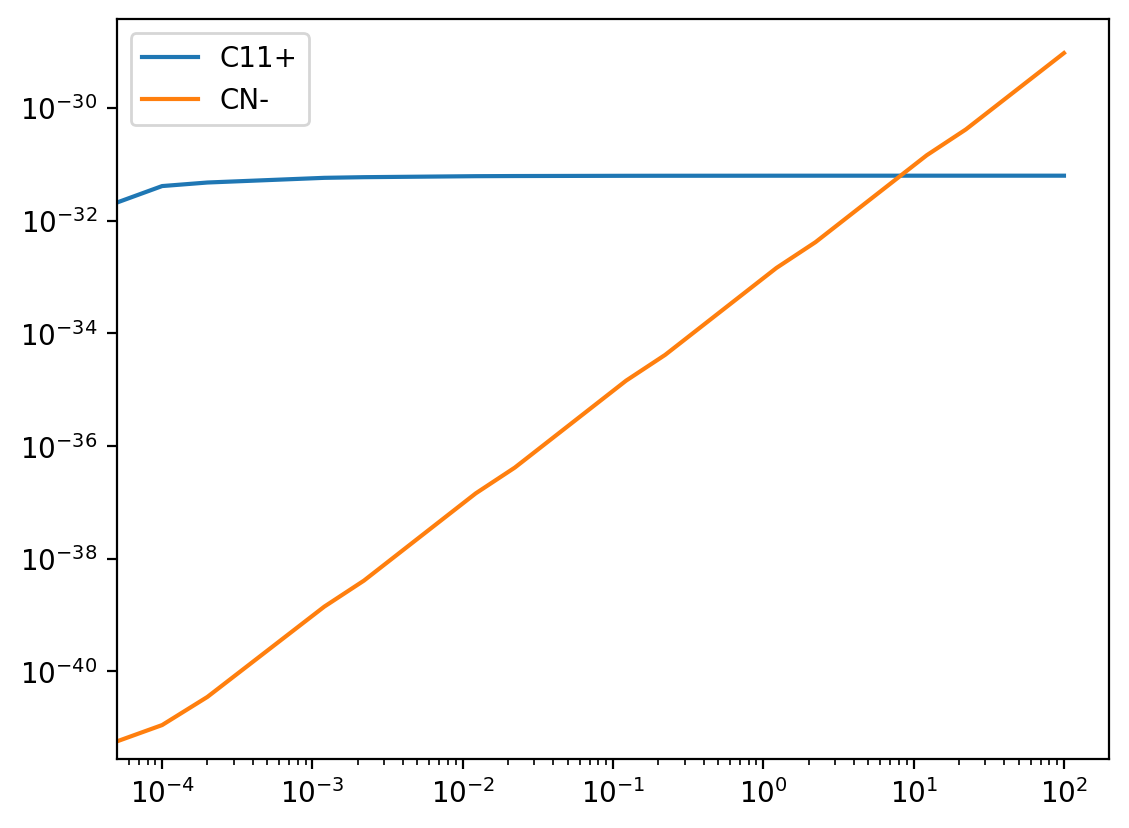

In [61]:
nbs = [465, 57]

for nb in nbs:
    plt.loglog(ts, -ys[nb], label = specs[nb])
plt.legend()
plt.show()

In [54]:
ions = list()
for spec in specs:
    if spec[-1] == '+' or spec[-1] == '-':
        ions.append(spec)


In [55]:
len(ions)

296